In [2]:
import glob
import csv
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import Utilities as utils
import imp
from sklearn.decomposition import PCA as sklearnPCA

In [3]:
imp.reload(utils)
## Load and normalize tables_a
filelist = utils.load_filelist("/home/april/IActData_Export/*")
tables_a, final_flist = utils.generate_table(filelist, rm_cap=True, return_flist=True)
tables_a = utils.norm1(tables_a)

In [4]:
#load cell list
cell_labels = utils.readin_cell_labels('data/Cell_Types.csv')
if(np.alltrue(np.array(final_flist)==cell_labels[:,0])):
    print('Loaded {len(final_flist)} traces successfully!')
else:
    print('Warning! filelist does not match loaded in files! Neuron Assignments will be incorrect!!!')

Loaded {len(final_flist)} traces successfully!


In [5]:
np.unique(cell_labels[:,1])

array(['AC', 'BB', 'DB', 'DB1', 'DB1 cone', 'DB1 or DB4B', 'DB2',
       'DB2 cone', 'DB2 or DB3', 'DB2 or FMB', 'DB2 or ON', 'DB3',
       'DB3 or DB4', 'DB3A', 'DB3B', 'DB3B cone', 'DB4', 'DB4 or DB3B',
       'DB4 or DB5', 'DB5', 'DB5 or DB6', 'DB6', 'FMB', 'FMB cone',
       'FMB cones', 'FMB or DB2', 'GBC', 'IMB', 'MB', 'OFF DB', 'ON',
       'ON DB', 'RBC', 'RBC or DB6', 'RBC or ON', 'Unknown'], 
      dtype='<U13')

In [9]:
imp.reload(utils)


## DB/NON

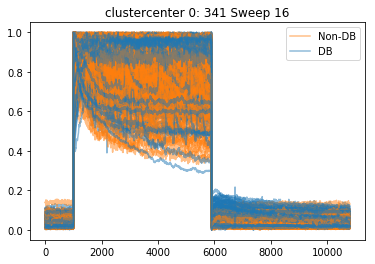

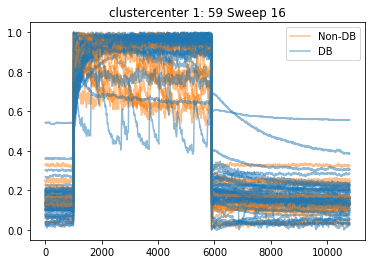

In [18]:
imp.reload(utils)
db_categorization, db_labels = utils.mark_cell_categories(cell_labels, 'DB')
utils.apply_kmeans(2, tables_a, db_categorization, db_labels)

## On Off

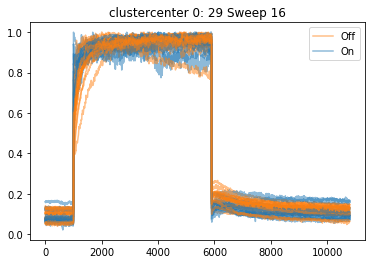

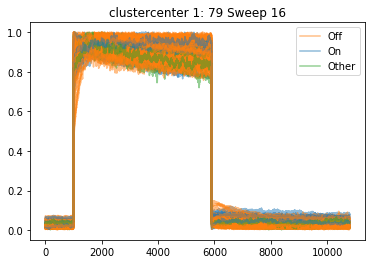

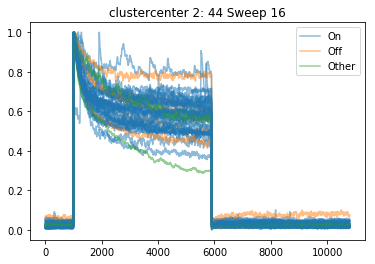

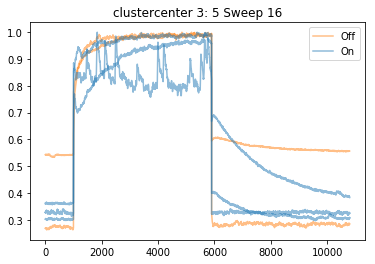

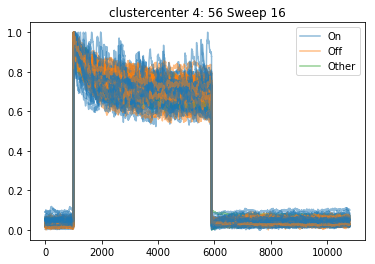

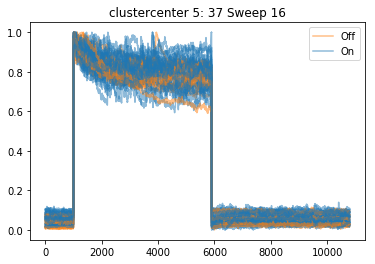

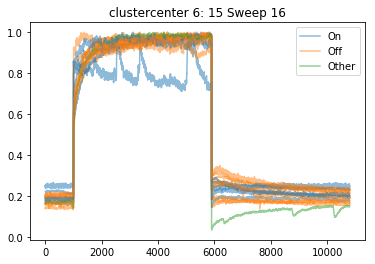

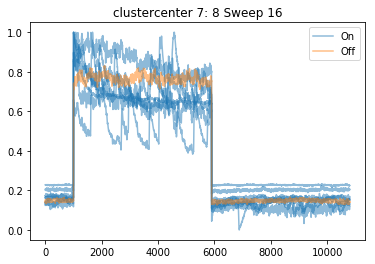

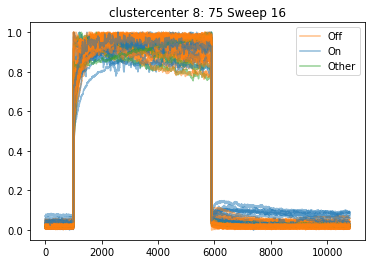

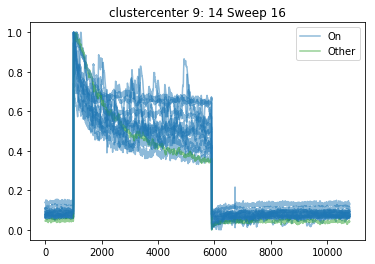

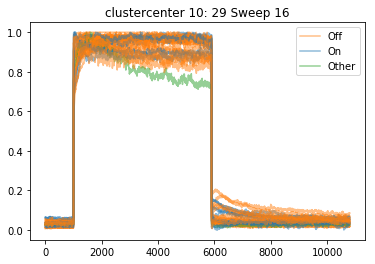

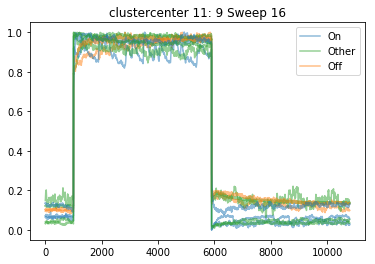

In [8]:
imp.reload(utils)
onoff_categorization, onoff_labels = utils.mark_cell_categories(cell_labels, 'On_Off')
utils.apply_kmeans(12, tables_a, onoff_categorization, onoff_labels)

## RBC/Non

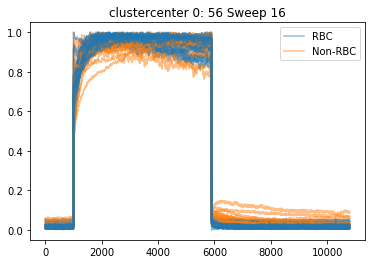

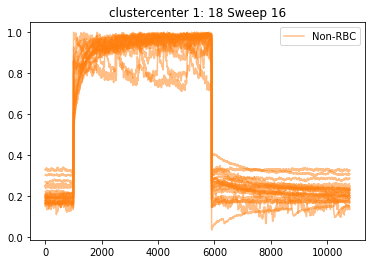

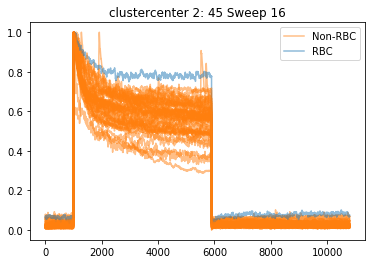

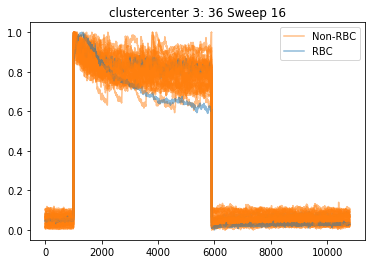

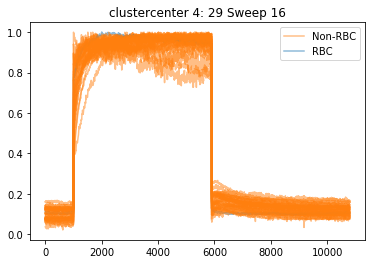

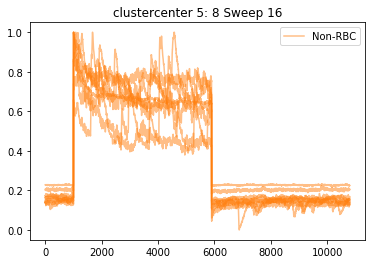

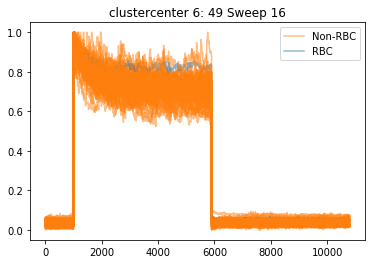

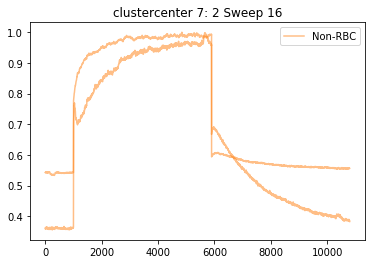

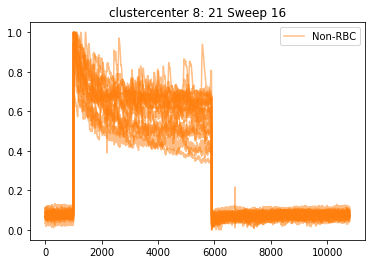

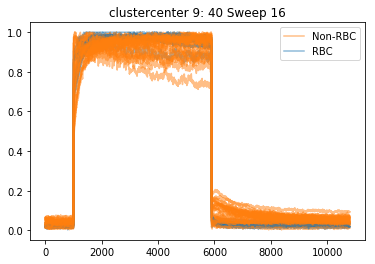

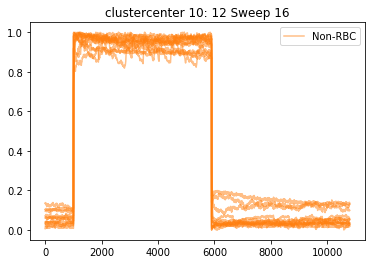

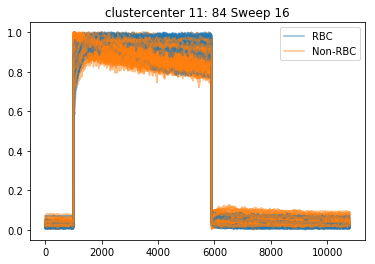

In [17]:
imp.reload(utils)
rbc_categorization, rbc_labels = utils.mark_cell_categories(cell_labels, 'RBC')
utils.apply_kmeans(12, tables_a, rbc_categorization, rbc_labels)

### Full Categorization

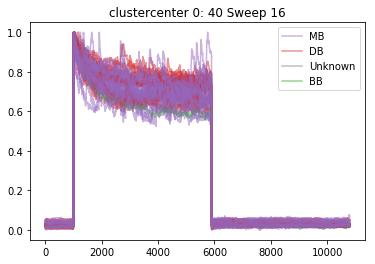

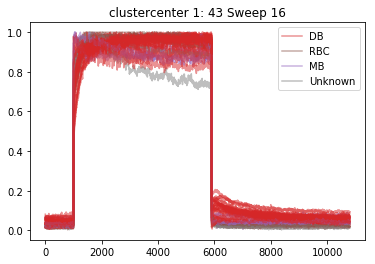

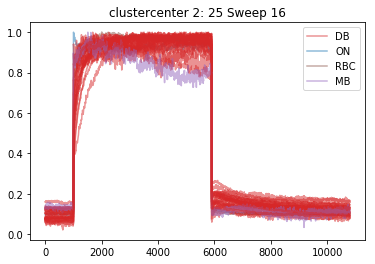

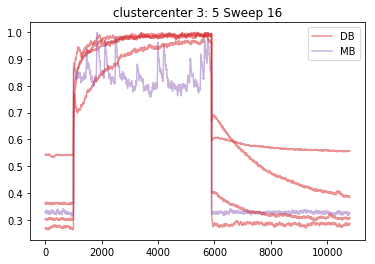

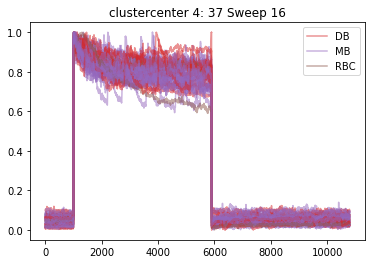

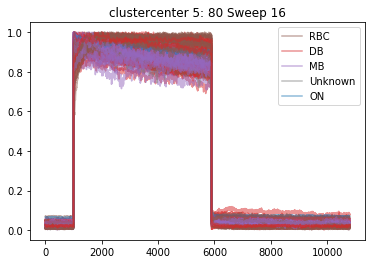

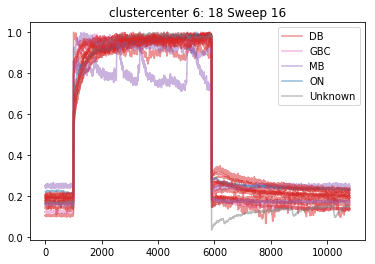

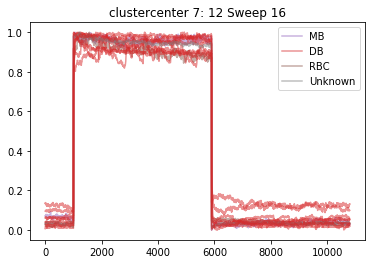

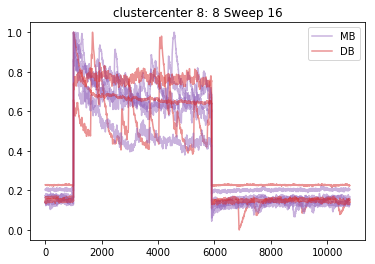

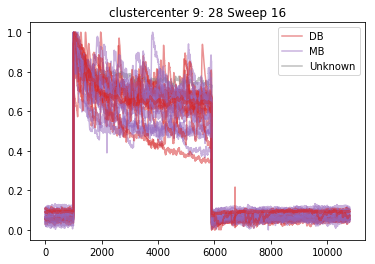

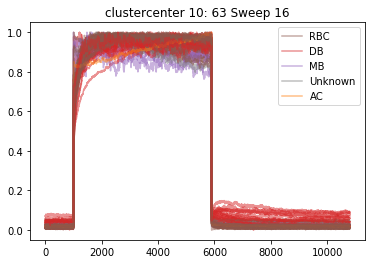

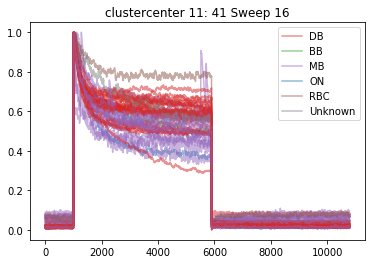

In [10]:
imp.reload(utils)
full_categorization, full_labels = utils.mark_cell_categories(cell_labels, 'Full')
utils.apply_kmeans(12, tables_a, full_categorization, full_labels)

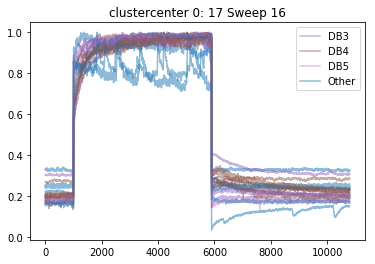

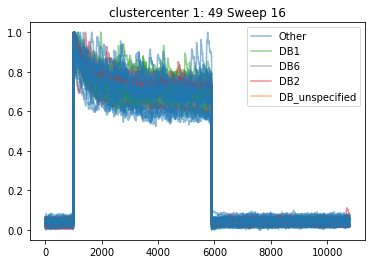

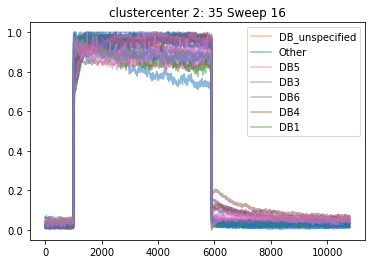

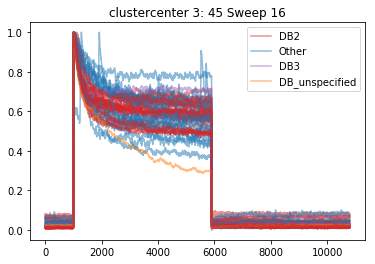

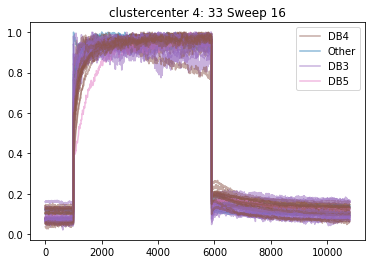

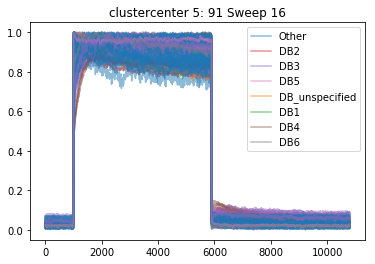

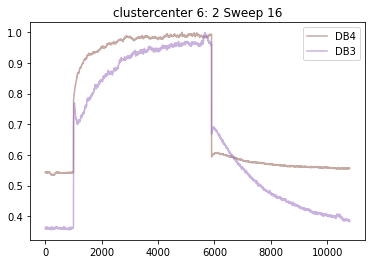

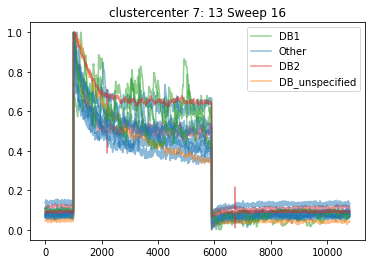

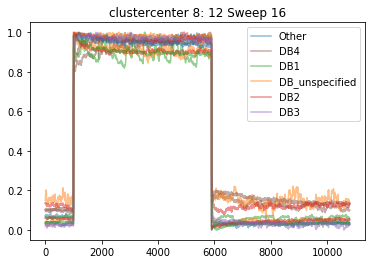

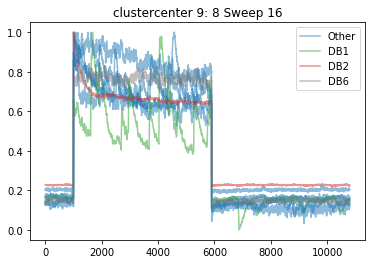

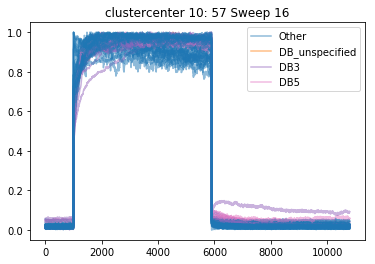

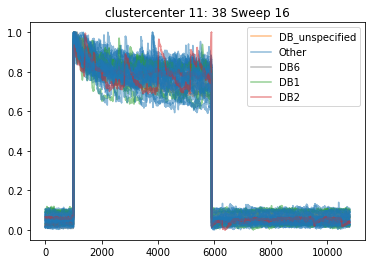

In [13]:
imp.reload(utils)
dbsub_categorization, dbsub_labels = utils.mark_cell_categories(cell_labels, 'DB_Subtypes')
utils.apply_kmeans(12, tables_a, dbsub_categorization, dbsub_labels)

In [ ]:
from sklearn.utils.linear_assignment_ import linear_assignment

y_true = y.astype(np.int64)
D = max(y_pred.max(), y_true.max()) + 1
w = np.zeros((D, D), dtype=np.int64)
# Confusion matrix.
for i in range(y_pred.size):
    w[y_pred[i], y_true[i]] += 1
ind = linear_assignment(-w)
acc = sum([w[i, j] for i, j in ind]) * 1.0 / y_pred.size